In [2]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier



In [3]:
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


To know my variables

In [5]:
y = data["target"]
X = data.drop('target',axis=1)

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


To split my dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

To check if the data is splitted

In [8]:
len(X_test)

205

In [9]:
len(X_train)

820

In [10]:
print(y_test.unique())

[1 0]


SCALING THE DATA FOR BETTER PERFORMANCE

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-1.40503359,  0.64895597,  1.97748631, ...,  0.97028605,
         1.17427458, -0.5144228 ],
       [ 1.26270023, -1.5409366 ,  1.01170979, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [-0.18232226,  0.64895597,  1.01170979, ...,  0.97028605,
         2.13238916, -0.5144228 ],
       ...,
       [ 1.15154465,  0.64895597,  1.97748631, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [ 1.3738558 ,  0.64895597, -0.91984324, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ],
       [ 0.59576677,  0.64895597,  1.01170979, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ]])

In [15]:
X_test

array([[-1.18272244,  0.64895597,  1.01170979, ...,  0.97028605,
        -0.74195458, -0.5144228 ],
       [ 0.37345562, -1.5409366 ,  0.04593327, ...,  0.97028605,
         1.17427458, -0.5144228 ],
       [ 0.9292335 ,  0.64895597, -0.91984324, ...,  0.97028605,
         1.17427458,  1.10177143],
       ...,
       [-1.29387801, -1.5409366 ,  1.01170979, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ],
       [ 1.26270023, -1.5409366 , -0.91984324, ..., -0.6668221 ,
         1.17427458,  1.10177143],
       [ 1.81847811, -1.5409366 , -0.91984324, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ]])

First with Logistic Regression algorithm

In [16]:
lr =LogisticRegression()

In [17]:
Reg_model = lr.fit(X_train, y_train) 

In [18]:
Reg_model.score(X_train, y_train)

0.8585365853658536

In [20]:
# With different machine learning algorithm I try to find algorithm which predict accurately.

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

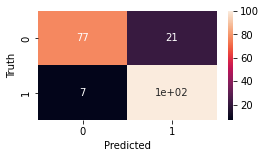

In [21]:
plt.figure(figsize=(4,2))
sns.heatmap(lr_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Secondly with Naive Bayes algorithm

In [22]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))


confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

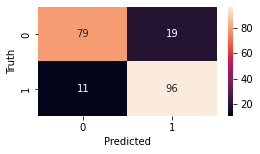

In [23]:
plt.figure(figsize=(4,2))
sns.heatmap(nb_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Third algorithm is the Random Forest Classfier

In [24]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))


confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

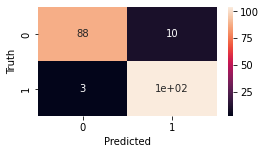

In [25]:
plt.figure(figsize=(4,2))
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With Extreme Gradient Boost

In [26]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))


confussion matrix
[[ 84  14]
 [  6 101]]


Accuracy of Extreme Gradient Boost: 90.2439024390244 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.88      0.94      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

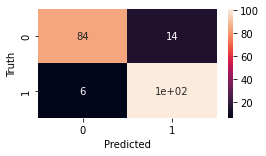

In [27]:
plt.figure(figsize=(4,2))
sns.heatmap(xgb_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With K-NeighborsClassifier 

In [28]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))


confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

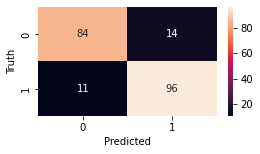

In [29]:
plt.figure(figsize=(4,2))
sns.heatmap(knn_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))


confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

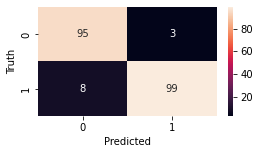

In [31]:
plt.figure(figsize=(4,2))
sns.heatmap(dt_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With Support Vector Classifier

In [32]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

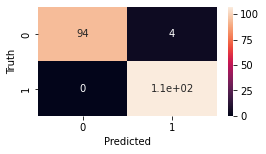

In [33]:
plt.figure(figsize=(4,2))
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

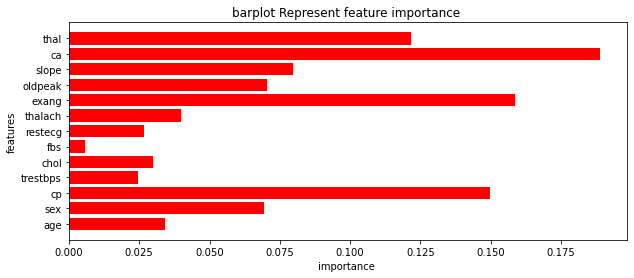

In [24]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'red')
plt.show()